In [1]:
# マルコフ連載

# 実数値確率変数の列X=Xn(n=0,1,2,...)と集合B⊂Rに対して、
# P(Xn+1∈B|Xn,Xn-1,...,X1,X0) = P(Xn+1∈B|Xn) となるとき、
# これを確率変数Xの「マルコフ性」といい、このような性質を持つXを「マルコフ連鎖」という
# 要するに次の遷移の確率が完全に現在の状態にのみ依存し、それ以前の状態には依存しないことをいう
# nを時間の変数とみなすとき、Xnは時点nのおける何らかの"状態"を表すと考え、
# Xnがとる値の空間のことを「状態空間」ということがある
# また、ある時点nからmステップ先の確率をmステップ「推移確率」といい、
# 特にその確率が時点nによらないとき、マルコフ連鎖Xは「斉時的」であるという

# 具体例(天気の予測)
import numpy as np

states = ["sunny", "rainy"]
# S=sunny, R=rainnyでSSはsunny->sunnyとなる状態遷移
transitions = [["SS", "SR"],["RS", "RR"]]
# transitionsの各要素に対応する確率行列
T = [[0.9, 0.1],[0.5, 0.5]]

# 現在の天気
today_weather = "sunny"

# 予測したい日数
forcast_days = 5

# 現在の天気と上の遷移確率に基づいて推測
weather_list = []
n_days = 0
prob = 1.0
while n_days != forcast_days:
    if today_weather == "sunny":
        change = np.random.choice(transitions[0], p=T[0])
        if change == "SS":
            prob = prob * T[0][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[0][1]
            weather_list.append(states[1])            
    else:
        change = np.random.choice(transitions[1], p=T[1])
        if change == "RS":
            prob = prob * T[1][0]
            weather_list.append(states[0])
        else:
            prob = prob * T[1][1]
            weather_list.append(states[1])        
    n_days+=1

print(f"天気予測結果：{weather_list}")

天気予測結果：['sunny', 'rainy', 'sunny', 'sunny', 'sunny']


In [2]:
# 離散的で有限な状態空間

# 応用上は、離散的な状態空間Sをもつ斉時的マルコフ連鎖が重要である
# 特に状態空間が有限個の要素からなるとき、Xを「有限マルコフ連鎖」という
# 以下、一般性を失うことなくS={x1,x2,...}とし、X=Xn(n=0,1,2,..)をS上の
# 斉時的有限マルコフ連鎖とする。このとき、状態iから状態jへのmステップ推移確率を
# pm(i,j) = P(Xn+m=j|Xn=i), i,j∈S とおく
# これをi,j成分において作ったN*N行列Q(m)をマルコフ連鎖Xのmステップ「推移確率行列」という
# また、任意の行列成分の和が1で、各成分が0以上となるものを「確率行列」という

# 具体例(じゃんけんの推移確率行列(m=2))
transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3
print(f"じゃんけんの推移確率行列：\n{transition_matrix}")

じゃんけんの推移確率行列：
[[0.4 0.3 0.3]
 [0.6 0.1 0.3]
 [0.5 0.2 0.3]]


In [3]:
# 推移確率の性質

# Xnに対して、pn(k):=P(Xn=k)(k∈S)と書くとき、
# πn = (pn(1), pn(2),.,pn(N))なるN次元ベクトルを時点nにおけるXの「状態ベクトル」という
# 特にπ0をXの「初期分布」という。また Σpn(k) = 1となる。
# このように、成分の総和が1となるベクトルを「確率ベクトル」という
# 推移確率行列と状態確率ベクトルについては以下が成り立つ
# (1)任意の自然数l,mに対して、Q(m+l) = Q(m)*Q(l) = (Q**m)*(Q**l)
# 任意のn=0,1,2,..に対して、πn = π0*(Q**n)

# 具体例(じゃんけんの推移確率行列)
m = 2
l = 3

m_transition_matrix = np.linalg.matrix_power(transition_matrix, m)
l_transition_matrix = np.linalg.matrix_power(transition_matrix, l)

# Q(m+l)
ml_transition_matrix = np.linalg.matrix_power(transition_matrix, m+l)
print(f"Q(m+l):\n{ml_transition_matrix}\n")

# Q(m)*Q(l) = (Q**m)*(Q**l)
ml_transition_matrix = np.dot(m_transition_matrix, l_transition_matrix)
print(f"Q(m)*Q(l) = (Q**m)*(Q**l):\n{ml_transition_matrix}")

Q(m+l):
[[0.47488 0.22512 0.3    ]
 [0.4752  0.2248  0.3    ]
 [0.47504 0.22496 0.3    ]]

Q(m)*Q(l) = (Q**m)*(Q**l):
[[0.47488 0.22512 0.3    ]
 [0.4752  0.2248  0.3    ]
 [0.47504 0.22496 0.3    ]]


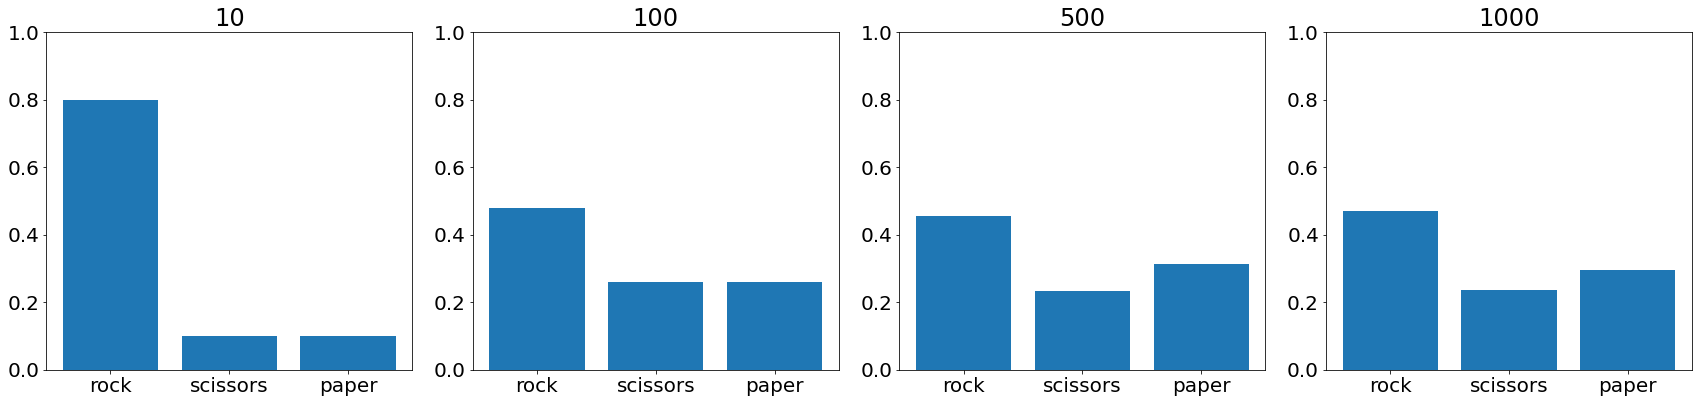

In [4]:
# 定常分布

# 状態確率ベクトルπnにおいてn→∞としたときの極値が存在する場合を考える
# π:=lim πn このとき両辺でn→∞とすると、π = π*Qが成り立つ
# πは行列Qの固有値1に対する左固有ベクトルである
# この意味は、マルコフ連鎖Xの初期分布がπであったとすると、1回の推移によって
# 状態変化しないということであり、長い時間のあと状態確率がπに収束してしまうと、
# そのあと何回推移してもその状態確率は変化しない
# このような状態確率をXの「定常分布」といい、初期状態が定常分布なマルコフ連鎖のことを
# 「定常マルコフ連鎖」という

# 具体例(じゃんけん)
import matplotlib.pyplot as plt

transition_matrix = np.zeros([3,3])

# 0: rock, 1:scissors, 2:paper
transition_matrix[0,0] = 0.4
transition_matrix[0,1] = 0.3
transition_matrix[0,2] = 0.3
transition_matrix[1,0] = 0.6
transition_matrix[1,1] = 0.1
transition_matrix[1,2] = 0.3
transition_matrix[2,0] = 0.5
transition_matrix[2,1] = 0.2
transition_matrix[2,2] = 0.3

T = 1000 # 試行回数
np.random.seed(1)

# rockを初期状態として計算
h_init = 0
h_arr = [h_init]
h = h_init
for i in range(T):
    h = np.random.choice(3,1,p=transition_matrix[h,:])[0]
    h_arr.append(h)

# グラフに描画
hist1, bin1 = np.histogram(h_arr[:10],bins=np.arange(4),density=True)
hist2, bin2 = np.histogram(h_arr[:100],bins=np.arange(4),density=True)
hist3, bin3 = np.histogram(h_arr[:500],bins=np.arange(4),density=True)
hist4, bin4 = np.histogram(h_arr[:T],bins=np.arange(4),density=True)

plt.rcParams["font.size"] = 20
hands_label = ['rock','scissors','paper']

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.bar(hands_label,hist1)
plt.ylim([0, 1])
plt.title('10')

plt.subplot(1,4,2)
plt.bar(hands_label,hist2)
plt.ylim([0, 1])
plt.title('100')

plt.subplot(1,4,3)
plt.bar(hands_label,hist3)
plt.ylim([0, 1])
plt.title('500')

plt.subplot(1,4,4)
plt.bar(hands_label,hist4)
plt.ylim([0, 1])
plt.title('1000')

plt.tight_layout()
plt.show()

# 回数を重ねるごとに分布の形の変化が小さくなっている=収束していることがわかる
# 十分に時間が経過したとき、とりあえずグーを出し続ければ勝つ確率が高いと言える

In [5]:
# 定常分布は、固有値1の固有ベクトルの和が1となるように規格化するとを求められる
import numpy.linalg as LA

w, v = LA.eig(transition_matrix.T)
idx = np.argmin(np.abs(np.real(w)-1))
w = np.real(v[:, idx]).T 
w /= np.sum(w)
print(f"定常分布π=:{w}")

定常分布π=:[0.475 0.225 0.3  ]


最尤推定値(Θ):0.07


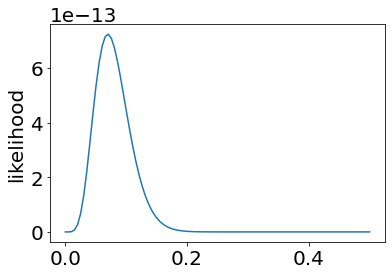

In [19]:
# 有限マルコフ連鎖のパラメータ推定

# 推移行列Qが未知パラメータΘに依存しているとする
# Xに関する観測データx0,x1,..,xnが与えられたとき、その実現確率は
# P(X0=x0, X1=x1,..,Xn=xn) = p0(x0)*ΠpΘ(xj-1, xj) で与えられる
# 従って、θの最尤推定値Θ'は以下の尤度方程式の解として求められる
# ∂/∂Θln(Θ')=0
# 独立で同一分布に従うようなマルコフ連鎖が複数観測される場合も同様に上記で求められる

theta = 0 # 未知パラメータ

q_matrix = np.zeros([3,3])

# 0: A, 1:B, 2:C
def update_q_matrix(param):
    q_matrix[0,0] = 1-param
    q_matrix[0,1] = param
    q_matrix[0,2] = 0
    q_matrix[1,0] = 0.1
    q_matrix[1,1] = 0.9-param
    q_matrix[1,2] = param
    q_matrix[2,0] = 0
    q_matrix[2,1] = 0.1
    q_matrix[2,2] = 0.9

a_num = 30
b_num = 50
c_num =10

a2b = 5 # A→Bへの移動数
b2c = 1 # B→Cへの移動数

x_min = 0.0
x_max = 0.5
x_num = 100

x = np.linspace(x_min, x_max, x_num) # 0<Θ<0.5
retult_list = []
for theta in x:
    update_q_matrix(theta)
    result = \
        (q_matrix[0,0]**(a_num-a2b))*(q_matrix[0,1]**a2b)*\
        (q_matrix[1,1]**(b_num-b2c))*(q_matrix[1,2]**b2c)*\
        (q_matrix[2,2]**c_num)
    retult_list.append(result)

print(f"最尤推定値(Θ):{retult_list.index(max(retult_list))*x_max/x_num}")
plt.ylabel("likelihood")
plt.plot(x, retult_list)
plt.show()